In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [360]:
from sklearn.preprocessing import MinMaxScaler

In [361]:
import joblib as jb

In [362]:
house_train = jb.load(filename='house_train_data')

In [363]:
house_train_1 = house_train.copy()

In [364]:
scaler = MinMaxScaler()

In [365]:
discrete = ['YearBuilt','YearRemodAdd','YrSold']

In [366]:
continous_features = [x for x in house_train.columns if len(house_train[x].unique())>25]

In [367]:
continous_features = [x for x in continous_features if x not in discrete]

In [368]:
categorical_features = [x for x in house_train.columns if x not in discrete]

In [369]:
categorical_features = [x for x in categorical_features if len(house_train[x].unique())<=25]

In [370]:
continous_features.append('MiscVal')
continous_features.append("PoolArea")
continous_features.append('3SsnPorch')

In [371]:
categorical_features.remove('MiscVal')
categorical_features.remove("PoolArea")
categorical_features.remove('3SsnPorch')

In [372]:
categorical_features = [x for x in categorical_features if house_train[x].dtype == 'O']

In [373]:
len(categorical_features)

39

In [374]:
house_train.shape

(1460, 76)

### Highly Corelated features

In [375]:
def correlation(data,threshold):
    corr_data = data.corr()
    corr = []
    for i in corr_data.columns:
        for j in corr_data.index:
            if i!= j:
                if corr_data.loc[i,j] > threshold:
                    if (i not in corr) & (j not in corr):
                        corr.append(i)
    return print(corr)

In [376]:
print("Highly correlated features :")
correlation(house_train[house_train.columns[1:-1]],threshold = 0.8)

Highly correlated features :
['TotalBsmtSF', 'GrLivArea', 'GarageCars']


### Handling categorical data

In [356]:
from sklearn.preprocessing import OneHotEncoder

In [377]:
for i in categorical_features:
    oh = OneHotEncoder(sparse = False,drop = 'first')
    oh.fit(house_train[[i]])
    cate = oh.categories_[0]
    u = 0
    for j in cate[1:]:
        if u <= len(cate[1:]):
            house_train_1[j] = oh.transform(house_train[[i]])[:,u]
        u +=1
    house_train_1.drop(i,axis = 1,inplace = True)

In [378]:
house_train_1.shape

(1460, 177)

## Information Gain
* **it helps to find relationship btw independent and dependent features**
* *high score means high relation*
* Mutual information (MI) [1]_ between two random variables is a non-negativevalue, which measures the dependency between the variables. 
* It is equalto zero if and only if two random variables are independent, and higher values mean higher dependency.


In [315]:
from sklearn.preprocessing import MinMaxScaler

In [316]:
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif

In [317]:
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [318]:
continous_features.remove('SalePrice')

In [319]:
continous_features.remove("Id")

In [320]:
scaler = MinMaxScaler()

In [321]:
house_train_1[continous_features] = scaler.fit_transform(house_train_1[continous_features])

In [322]:
house_train_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,0.150685,0.033420,7,5,2003,2003,0.12250,0.125089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,0.202055,0.038795,6,8,1976,1976,0.00000,0.173281,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,0.160959,0.046507,7,5,2001,2002,0.10125,0.086109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,0.133562,0.038561,7,5,1915,1970,0.00000,0.038271,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,0.215753,0.060576,8,5,2000,2000,0.21875,0.116052,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [323]:
x = house_train_1[continous_features]
y = house_train['SalePrice']

In [324]:
mutual_info = mutual_info_regression(x,y)

In [325]:
mutual_info_data = pd.DataFrame(data = mutual_info,index = continous_features,columns=['Values'])

In [326]:
mutual_info_data.sort_values('Values',ascending = False,inplace = True)

<AxesSubplot:ylabel='Values'>

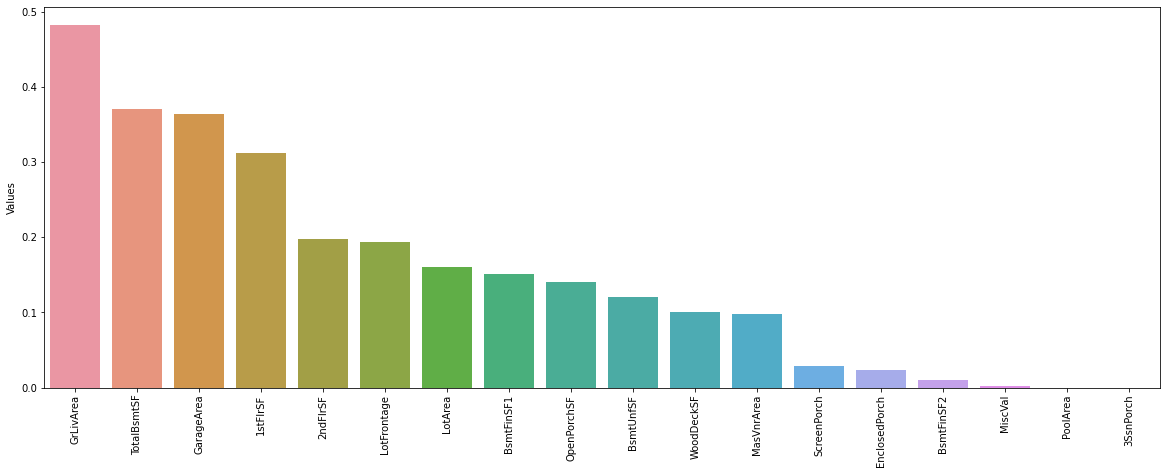

In [327]:
plt.figure(figsize=(20,7))
plt.xticks(rotation = 90)
sns.barplot(y = 'Values',x = mutual_info_data.index,data = mutual_info_data)

In [328]:
reg_percentile = SelectPercentile(mutual_info_regression,percentile=20).fit(x,y)

In [329]:
x.columns[reg_percentile.get_support()]

Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'], dtype='object')

In [330]:
reg_k = SelectKBest(mutual_info_regression,k = 4).fit(x,y)
x.columns[reg_k.get_support()]

Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'], dtype='object')

In [379]:
jb.dump(categorical_features,'categories')

['categories']

In [59]:
jb.dump(continous_features,'continuous')

['continuous']

In [331]:
jb.dump(house_train_1,filename='house_train')

['house_train']

In [332]:
house_train_1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=177)